<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [4]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [5]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [1]:
# Import necessary modules
import numpy as np
import re

# ML libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# spaCy and friends
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_lg')

# Gensim - topic modeling
import gensim
import os, sys, re
from gensim.models import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# Pretty pictures
import squarify
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def tokenize(doc):
    
    tokens = [t for t in simple_preprocess(doc) if t not in STOPWORDS]
    
    return tokens

In [6]:
yelp['tokens'] = yelp['text'].apply(lambda x: tokenize(x))

yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[ve, vegas, dozens, times, stepped, foot, circ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, street, party, best, act..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[stars, bad, price, lunch, seniors, pay, eatin..."


In [53]:
# Visualize the tokens
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [54]:
wc = count(yelp['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
172,food,3363,5071,1.0,0.010553,0.010553,0.3363
134,place,3385,4832,2.0,0.010056,0.020609,0.3385
38,good,3228,4806,3.0,0.010002,0.030611,0.3228
237,great,3101,4297,4.0,0.008943,0.039554,0.3101
37,service,2987,3695,5.0,0.007690,0.047244,0.2987


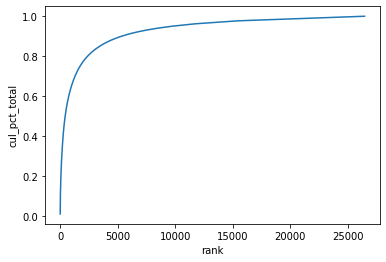

In [55]:
# Plot word distribution
import seaborn as sns
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

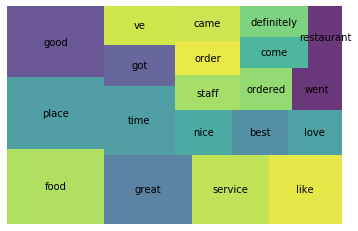

In [56]:
# Visualize the top 20 words
# Get good ratings
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [7]:
vect = TfidfVectorizer()

dtm = vect.fit_transform(yelp['text'].values)
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_df.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Instantiate nearest-neighbors model
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [10]:
# Fake review and query among 10 most similar
fake_text = ['このお店はピザがあんまり美味しくないけど、店員さんがすっごく優しかったです。それにしてももう一回行こうと思ってます。']
fake_text_trans = vect.transform(fake_text)

_, similar_topic_indices = nn.kneighbors(fake_text_trans.todense())

In [19]:
similar_topics = [yelp['text'][t] for t in similar_topic_indices]
print(similar_topics, sep='\n\n')

[3615    Ok, so this place is a big box dental corporat...
3072    Suis venue ici un samedi soir pendant l'événem...
1412    Items Selected:\nCronut\nButtermilk Bar\nThe K...
1628    Visited this restaurant for lunch, after I had...
4104    Oh I am sorry, did you want some food?  This s...
Name: text, dtype: object]


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [22]:
vect_pipe = TfidfVectorizer()
sgdc = SGDClassifier()
pipe = Pipeline([('vect', vect_pipe),
                  ('sgdc', sgdc)])

parameters = {
    'vect__max_df': (0.5, 0.75),
    'vect__min_df': (.02, .05),
    'vect__max_features': ( 100, 500, 1000),
    'sgdc__max_iter': (300, 1000),
}
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=10)

In [23]:
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.9min finished
/anaconda3/envs/u4s1env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClass

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (100, 500, 1000), 'sgdc__max_iter': (300, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [24]:
grid_search.best_score_

0.608

In [25]:
grid_search.predict(yelp['text'])

array([1, 5, 4, ..., 1, 5, 1])

In [27]:
# Stretch goal
vect2 = CountVectorizer()
sgdc2 = SGDClassifier()
pipe2 = Pipeline([('vect', vect2),
                  ('sgdc', sgdc2)])

param2 = {
    'vect__max_df': (0.5, 0.75),
    'vect__min_df': (.02, .05),
    'vect__max_features': ( 100, 500, 1000),
    'sgdc__max_iter': (300, 1000),
}
grid2 = GridSearchCV(pipe2, param2, cv=5, n_jobs=-1, verbose=10)

In [28]:
grid2.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.8min finished
/anaconda3/envs/u4s1env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClass

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (100, 500, 1000), 'sgdc__max_iter': (300, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [29]:
grid2.best_score_

0.6008

In [30]:
grid2.predict(yelp['text'])

array([1, 5, 4, ..., 1, 5, 1])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [33]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

# Define generator function
def get_reviews(df, token_col):

    for index, row in df.iterrows():
        review_token = row[token_col]
        yield review_token

Learn the vocubalary of the yelp data:

In [35]:
id2word = corpora.Dictionary(get_reviews(yelp, 'tokens'))

Create a bag of words representation of the entire corpus

In [37]:
corpus = [id2word.doc2bow(review) for review in get_reviews(yelp, 'tokens')]

Your LDA model should be ready for estimation: 

In [38]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [39]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [40]:
topics = [' '.join(t[0:5]) for t in words]

In [41]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id + 1} ------")
    print(t, end="\n\n")

------ Topic 1 ------
place great food like good

------ Topic 2 ------
place food good great time

------ Topic 3 ------
food place good great service

------ Topic 4 ------
good food service place great

------ Topic 5 ------
food place good service great

------ Topic 6 ------
good great food place service

------ Topic 7 ------
great food place good service

------ Topic 8 ------
good food like place time

------ Topic 9 ------
food place like time great

------ Topic 10 ------
place great good like food



In [42]:
pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

/anaconda3/envs/u4s1env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.003996 -0.002655       1        1  10.629053
2     -0.001165 -0.003559       2        1  10.358079
8     -0.002081  0.000965       3        1  10.313624
6     -0.003405 -0.001805       4        1  10.041327
9     -0.000129  0.003415       5        1   9.939195
0     -0.003668 -0.001845       6        1   9.894750
1     -0.000661  0.004121       7        1   9.834784
5      0.002688 -0.001723       8        1   9.708451
3      0.004519  0.000790       9        1   9.678023
7     -0.000093  0.002296      10        1   9.602718, topic_info=     Category         Freq        Term        Total  loglift  logprob
40    Default  4456.000000        good  4456.000000  30.0000  30.0000
208   Default  4125.000000       great  4125.000000  29.0000  29.0000
735   Default  1588.000000        love  1588.000000  28.0000  28.0000
45    Default  3502.000000     service  3502.000000  27.0000  27.0000
122   Default  1751.000000        best  1751.000000  26.0000  26.0000
144   Default  4757.000000        food  4757.000000  25.0000  25.0000
75    Default  1986.000000         got  1986.000000  24.0000  24.0000
359   Default  1194.000000   delicious  1194.000000  23.0000  23.0000
192   Default  1313.000000     amazing  1313.000000  22.0000  22.0000
18    Default  3331.000000        like  3331.000000  21.0000  21.0000
235   Default  1071.000000         way  1071.000000  20.0000  20.0000
46    Default  1505.000000       staff  1505.000000  19.0000  19.0000
103   Default   923.000000        room   923.000000  18.0000  18.0000
651   Default  1331.000000  restaurant  1331.000000  17.0000  17.0000
184   Default  1122.000000   recommend  1122.000000  16.0000  16.0000
36    Default   941.000000        wait   941.000000  15.0000  15.0000
207   Default  1106.000000       going  1106.000000  14.0000  14.0000
1266  Default  1488.000000     ordered  1488.000000  13.0000  13.0000
156   Default  1021.000000      pretty  1021.000000  12.0000  12.0000
115   Default  1858.000000          ve  1858.000000  11.0000  11.0000
117   Default  1433.000000        went  1433.000000  10.0000  10.0000
157   Default   873.000000       price   873.000000   9.0000   9.0000
264   Default  1250.000000  experience  1250.000000   8.0000   8.0000
85    Default   724.000000        long   724.000000   7.0000   7.0000
812   Default   675.000000       store   675.000000   6.0000   6.0000
37    Default  1440.000000        came  1440.000000   5.0000   5.0000
421   Default   808.000000       asked   808.000000   4.0000   4.0000
381   Default  1372.000000      little  1372.000000   3.0000   3.0000
34    Default  3303.000000        time  3303.000000   2.0000   2.0000
403   Default   656.000000      server   656.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
157   Topic10   103.949951       price   873.516663   0.2145  -6.0956
115   Topic10   203.334549          ve  1858.171509   0.1306  -5.4246
771   Topic10    67.124077       cream   536.962341   0.2637  -6.5329
1066  Topic10   127.611382         new  1118.006226   0.1728  -5.8905
144   Topic10   448.598175        food  4757.612305  -0.0182  -4.6333
535   Topic10   105.336960        work   907.997986   0.1890  -6.0823
359   Topic10   130.836578   delicious  1194.423340   0.1317  -5.8655
192   Topic10   141.456299     amazing  1313.445312   0.1147  -5.7875
735   Topic10   165.618988        love  1588.037109   0.0826  -5.6298
426   Topic10   122.100777      better  1116.344727   0.1302  -5.9346
133   Topic10   377.668243       place  4559.434082  -0.1478  -4.8055
45    Topic10   302.604065     service  3502.531982  -0.1057  -5.0270
726   Topic10    74.844337        feel   643.540283   0.1915  -6.4241
246   Topic10   112.111122       right  1055.757202   0.1006  -6.0200
180   Topic10   122.143433        menu  1193.154175   0.0640  -5.9343
358   Topic10   138

In [43]:
# Find coherence scores
def compute_coherence_values(dictionary, corpus, df, token_col, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    tokens = list(get_reviews(df, token_col))
    
    # for iter_ in range(passes):
    for num_topics in range(start, limit, step):
        stream = get_reviews(df, token_col)
        model = LdaMulticore(corpus=corpus, 
                             num_topics=num_topics, 
                             id2word=dictionary, 
                             workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=df[token_col], 
                                        dictionary=dictionary, 
                                        corpus=corpus, 
                                        coherence='c_v')
        coherence_values.append({
            'num_topics': num_topics,
            'coherence_score': coherencemodel.get_coherence()
                                })

    return model_list, coherence_values

In [45]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        df=yelp, 
                                                        token_col='tokens', 
                                                        start=2, 
                                                        limit=10)

In [46]:
cv_list = [d['coherence_score'] for d in coherence_values]

In [51]:
len(cv_list)

3

In [47]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,coherence_score,num_topics
0,0.372084,2
1,0.348524,5
2,0.350477,8


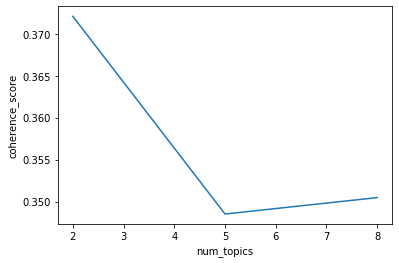

In [50]:
import seaborn as sns
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence);

## Findings
- Based on the data, it appears that a majority of people are posting positively about their dining experiences. That being said, it is uncertain whether removing sentiment words like "good" or "great" will render a more accurate analysis because we would also have to remove their opposites, which appear in the data far less frequently. More research is required.

- Additionally, coherence score is difficult to interpret. Different methods, like 'c_v' and 'u_mass', cannot be compared in the same way as RMSE & MAE. Optimizing for coherence will also require additional methods.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)